<a href="https://colab.research.google.com/github/shpotes/TF-workshop/blob/master/MNIST/conv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
  %tensorflow_version 2.x
  !pip uninstall -q -y tensorboard tb-nightly
  !pip install -q tb-nightly
  %reload_ext tensorboard
except:
  pass

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [0]:
# Load data
fashion_mnist = tf.keras.datasets.fashion_mnist 
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Data preprocessing
X_train = np.expand_dims(X_train, axis=-1) / 255.0
X_test = np.expand_dims(X_test, axis=-1) / 255.0

# Validation split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size=0.2)

In [4]:
X_train.shape

(48000, 28, 28, 1)

In [0]:
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential([
    layers.Conv2D(32, (7, 7), activation="relu", input_shape=[28, 28, 1]),
    layers.Conv2D(64, (5, 5), activation="relu"),
    layers.Flatten(),
    layers.Dense(256, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [6]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.optimizers.Adam(learning_rate=3e-4),
              metrics=["accuracy"])

hist = model.fit(X_train, y_train,
                 batch_size=32, epochs=15,
                 validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 17s 354us/sample - loss: 0.4765 - accuracy: 0.8286 - val_loss: 0.3396 - val_accuracy: 0.8779
Epoch 2/15
48000/48000 [==============================] - 15s 314us/sample - loss: 0.3088 - accuracy: 0.8871 - val_loss: 0.2843 - val_accuracy: 0.8941
Epoch 3/15
48000/48000 [==============================] - 15s 314us/sample - loss: 0.2534 - accuracy: 0.9062 - val_loss: 0.2609 - val_accuracy: 0.9047
Epoch 4/15
48000/48000 [==============================] - 15s 312us/sample - loss: 0.2118 - accuracy: 0.9210 - val_loss: 0.2596 - val_accuracy: 0.9086
Epoch 5/15
48000/48000 [==============================] - 15s 315us/sample - loss: 0.1759 - accuracy: 0.9342 - val_loss: 0.2626 - val_accuracy: 0.9084
Epoch 6/15
48000/48000 [==============================] - 15s 313us/sample - loss: 0.1417 - accuracy: 0.9472 - val_loss: 0.2611 - val_accuracy: 0.9129
Epoch 7/15
48000/48000 [====================

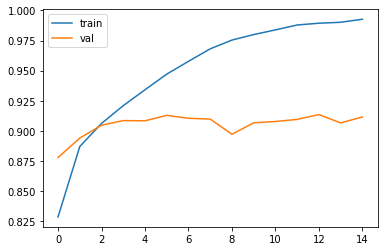

In [7]:
plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='val')
plt.legend()
plt.show()

![](https://miro.medium.com/max/1280/1*gGI9oAz0REW2hnU6YKmqDQ.jpeg)

In [8]:
tf.keras.backend.clear_session()
l2 = tf.keras.regularizers.l2(l=0.001)

model_reg = tf.keras.models.Sequential([
    layers.Conv2D(32, (7, 7), activation="relu", kernel_regularizer=l2,
                  input_shape=[28, 28, 1]),
    layers.Conv2D(64, (5, 5), activation="relu", kernel_regularizer=l2),
    layers.Flatten(),
    layers.Dense(256, activation="relu", kernel_regularizer=l2),
    layers.Dense(128, activation="relu", kernel_regularizer=l2),
    layers.Dense(10, activation="softmax", kernel_regularizer=l2)
])

model_reg.compile(loss="sparse_categorical_crossentropy",
                  optimizer=tf.optimizers.Adam(learning_rate=3e-3),
                  metrics=["accuracy"])

hist = model_reg.fit(X_train, y_train,
                 batch_size=32, epochs=30,
                 validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 19s 401us/sample - loss: 0.7804 - accuracy: 0.7976 - val_loss: 0.6217 - val_accuracy: 0.8308
Epoch 2/30
48000/48000 [==============================] - 18s 378us/sample - loss: 0.5840 - accuracy: 0.8450 - val_loss: 0.5647 - val_accuracy: 0.8453
Epoch 3/30
48000/48000 [==============================] - 18s 377us/sample - loss: 0.5422 - accuracy: 0.8567 - val_loss: 0.5287 - val_accuracy: 0.8602
Epoch 4/30
48000/48000 [==============================] - 18s 377us/sample - loss: 0.5248 - accuracy: 0.8611 - val_loss: 0.5365 - val_accuracy: 0.8555
Epoch 5/30
48000/48000 [==============================] - 18s 376us/sample - loss: 0.5121 - accuracy: 0.8656 - val_loss: 0.4877 - val_accuracy: 0.8700
Epoch 6/30
48000/48000 [==============================] - 18s 379us/sample - loss: 0.5035 - accuracy: 0.8677 - val_loss: 0.4960 - val_accuracy: 0.8656
Epoch 7/30
48000/48000 [====================

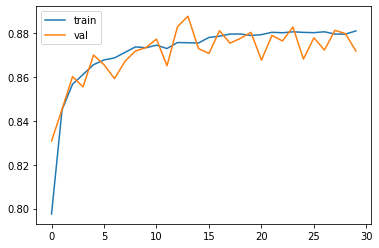

In [9]:
plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='val')
plt.legend()
plt.show()

# Callbacks
* ModelCheckpoint
* TensorBoard

## TensorBoard

In [0]:
!rm -rf logs*
tf.keras.backend.clear_session()
log_dir="logs/conv/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tboard = tf.keras.callbacks.TensorBoard(log_dir=log_dir, 
                                        update_freq='batch',
                                        histogram_freq=1,
                                        profile_batch=3)

In [11]:
%tensorboard --logdir logs/conv

Reusing TensorBoard on port 6006 (pid 228), started 0:54:07 ago. (Use '!kill 228' to kill it.)

<IPython.core.display.Javascript object>

In [12]:
l2 = tf.keras.regularizers.l2(l=0.001)

model = tf.keras.models.Sequential([
    layers.Conv2D(32, (7, 7), activation="relu", kernel_regularizer=l2,
                  input_shape=[28, 28, 1]),
    layers.Conv2D(64, (5, 5), activation="relu", kernel_regularizer=l2),
    layers.Conv2D(128, (3, 3), activation="relu", kernel_regularizer=l2),
    layers.Flatten(),
    layers.Dense(256, activation="relu", kernel_regularizer=l2),
    layers.Dense(128, activation="relu", kernel_regularizer=l2),
    layers.Dense(64, activation="relu", kernel_regularizer=l2),
    layers.Dense(10, activation="softmax", kernel_regularizer=l2)
])

model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=tf.optimizers.Adam(learning_rate=1e-3),
                  metrics=["accuracy"])

hist = model.fit(X_train, y_train,
                 batch_size=64, epochs=40,
                 validation_data=(X_val, y_val),
                 callbacks=[tboard])

Train on 48000 samples, validate on 12000 samples
Epoch 1/40
48000/48000 [==============================] - 20s 427us/sample - loss: 0.8476 - accuracy: 0.7994 - val_loss: 0.6181 - val_accuracy: 0.8587
Epoch 2/40
48000/48000 [==============================] - 19s 403us/sample - loss: 0.5966 - accuracy: 0.8581 - val_loss: 0.5895 - val_accuracy: 0.8505
Epoch 3/40
48000/48000 [==============================] - 19s 400us/sample - loss: 0.5296 - accuracy: 0.8715 - val_loss: 0.5221 - val_accuracy: 0.8673
Epoch 4/40
48000/48000 [==============================] - 19s 403us/sample - loss: 0.4874 - accuracy: 0.8789 - val_loss: 0.4898 - val_accuracy: 0.8767
Epoch 5/40
48000/48000 [==============================] - 19s 401us/sample - loss: 0.4618 - accuracy: 0.8835 - val_loss: 0.4532 - val_accuracy: 0.8858
Epoch 6/40
48000/48000 [==============================] - 19s 399us/sample - loss: 0.4455 - accuracy: 0.8886 - val_loss: 0.4434 - val_accuracy: 0.8890
Epoch 7/40
48000/48000 [====================

In [13]:
!tar -zcvf logs.tar.gz logs/conv/

logs/conv/
logs/conv/20191210-205717/
logs/conv/20191210-205717/validation/
logs/conv/20191210-205717/validation/events.out.tfevents.1576011457.b75e09c25671.502.271145.v2
logs/conv/20191210-205717/train/
logs/conv/20191210-205717/train/events.out.tfevents.1576011437.b75e09c25671.502.256512.v2
logs/conv/20191210-205717/train/events.out.tfevents.1576011439.b75e09c25671.profile-empty
logs/conv/20191210-205717/train/plugins/
logs/conv/20191210-205717/train/plugins/profile/
logs/conv/20191210-205717/train/plugins/profile/2019-12-10_20-57-19/
logs/conv/20191210-205717/train/plugins/profile/2019-12-10_20-57-19/local.trace


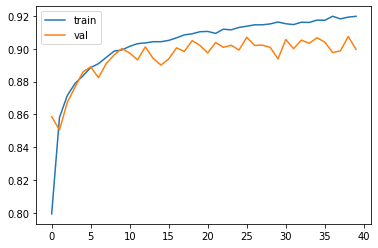

In [14]:
plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='val')
plt.legend()
plt.show()